## <t> Task 2 Prediction using Unsupervised Learning by KMeans

<h2> Predicting the optimum numbers of clusters that fit the Iris dataset

<font color="red">import necessary libraries</font>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

<h4> Load  data 

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<h3> Here the values of species is 3 unique values 
<h4>Iris-setosa       
<h4>Iris-versicolor    
<h4>Iris-virginica

<h3> Scattering data points based on 2 variables PetalLengthCm and PetalWidthCm and showing the classes of it

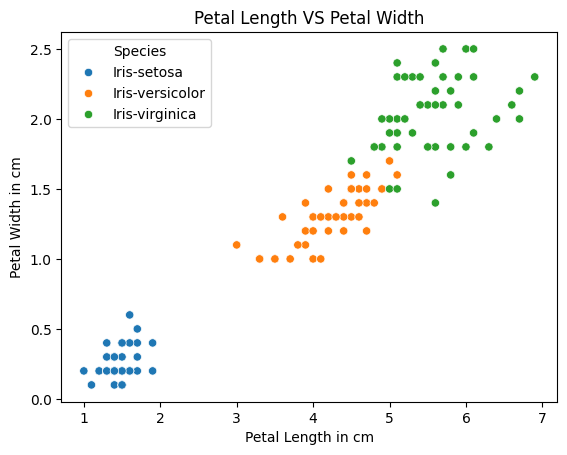

In [7]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue=df['Species'])
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.title('Petal Length VS Petal Width')
plt.show()

<h3> Scattering data points based on 2 variables SepalLengthCm and SepalWidthCm and showing the classes of it

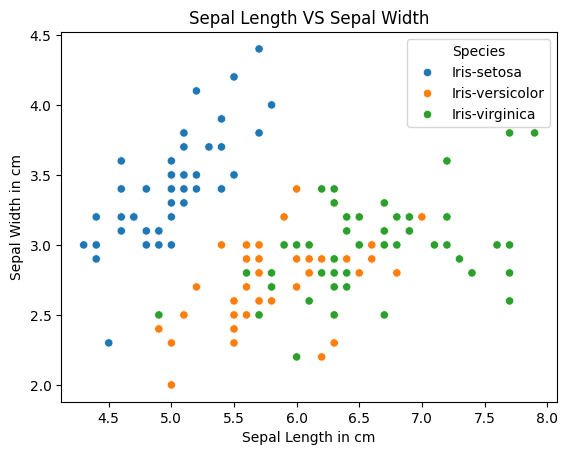

In [8]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue=df['Species'])
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.title('Sepal Length VS Sepal Width')
plt.show()

In [12]:
x=df.iloc[:,[1,2,3,4]].values

In [10]:
y=df[['Species']]
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


<h3>This Method called Elbow method to show the best numbers of clusters that fit the data

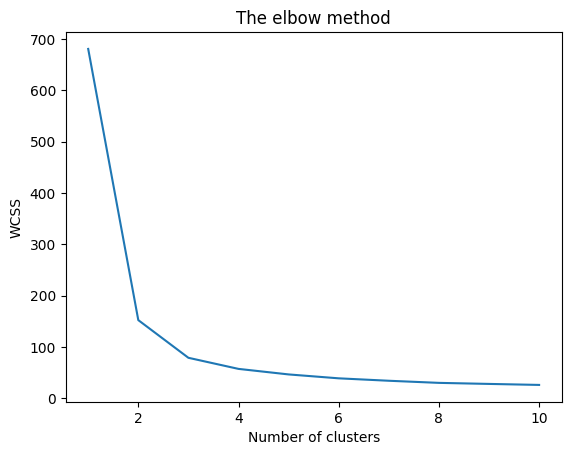

In [15]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#  observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

<h3>So the best numbers of clusters is 3 then it is must use it

In [16]:
kmean=KMeans(n_clusters=3,random_state=42)
kmean.fit(x)

c:\Users\eslamia\anaconda\envs\firstEnv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

<h2>Showing the 3 centroids of clusters

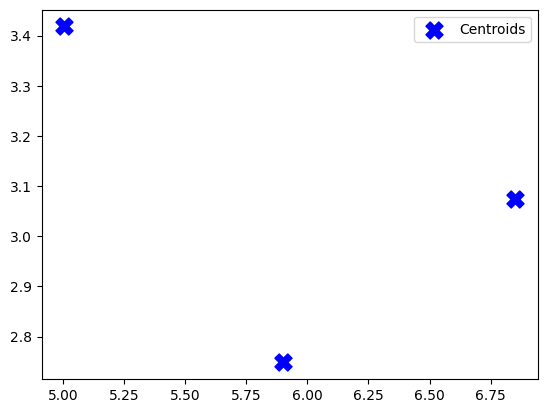

In [17]:
centroids = kmean.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=150, marker='X', label='Centroids')
plt.legend()
plt.show()

In [18]:
y_kmeans=kmean.predict(x)

<h4>Scattering the predictions of classses of data points based on 2 coulmns

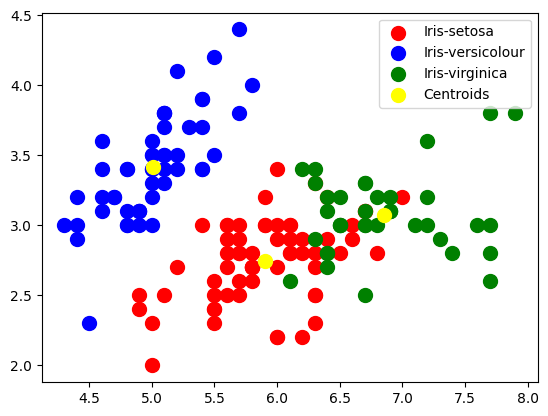

In [19]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# if want to predict the class of features from user

In [22]:
def take_input():
    feature_list=[]
    for i in range(4):
        try:
            # Use float() to convert user input to a float and append it to the list
            user_input = float(input(f"Enter float #{i + 1}: "))
            feature_list.append(user_input)
        except ValueError:
            print("Invalid input. Please enter a valid float.")

    # Print the list of float inputs
    print("List of float inputs:", feature_list)

    predicted_input=kmean.predict([feature_list])
    if predicted_input==0:
        print("The class is Iris-setosa ")
    elif predicted_input==1:
        print("The class is Iris-versicolour ")
    elif predicted_input==2:
        print("The class is Iris-virginica ")
    else:
        print("There is some error")

take_input()

List of float inputs: [2.0, 1.2, 5.0, 0.6]
The class is Iris-setosa 
